In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid")

### Exercício 01

In [3]:
file_name = './dataset/exercicio_01.csv'

In [4]:
df = pd.read_csv(file_name, sep=';')
df.head()

,Observação,Renda (R$)
0,1,"2.894,00"
1,2,"3.448,00"
2,3,"1.461,00"
3,4,"2.224,00"
4,5,"2.501,00"


In [5]:
df['Renda (R$)'] = df['Renda (R$)'].apply(lambda x: x.replace('.', '').replace(',', '.')).astype(float)
df.head()

,Observação,Renda (R$)
0,1,2894.0
1,2,3448.0
2,3,1461.0
3,4,2224.0
4,5,2501.0


In [6]:
# Define the bin edges for the intervals
bin_edges = range(0, int(df['Renda (R$)'].max()) + 2000, 2000)

# Create the frequency table
freq_table = pd.cut(df['Renda (R$)'], bins=bin_edges, right=True).value_counts().sort_index()

# Calculate the relative frequency
relative_freq = freq_table / freq_table.sum()

# Calculate the cumulative frequency
cumulative_freq = freq_table.cumsum()

# Calculate the cumulative relative frequency
cumulative_relative_freq = cumulative_freq / freq_table.sum()

# Create the final table
frequency_table = pd.DataFrame({
    'Interval': freq_table.index.astype(str),
    'Absolute Frequency': freq_table.values,
    'Relative Frequency': relative_freq.values,
    'Cumulative Frequency': cumulative_freq.values,
    'Cumulative Relative Frequency': cumulative_relative_freq.values
})

frequency_table


,Interval,Absolute Frequency,Relative Frequency,Cumulative Frequency,Cumulative Relative Frequency
0,"(0, 2000]",9,0.18,9,0.18
1,"(2000, 4000]",19,0.38,28,0.56
2,"(4000, 6000]",11,0.22,39,0.78
3,"(6000, 8000]",5,0.10,44,0.88
4,"(8000, 10000]",4,0.08,48,0.96
5,"(10000, 12000]",2,0.04,50,1.00


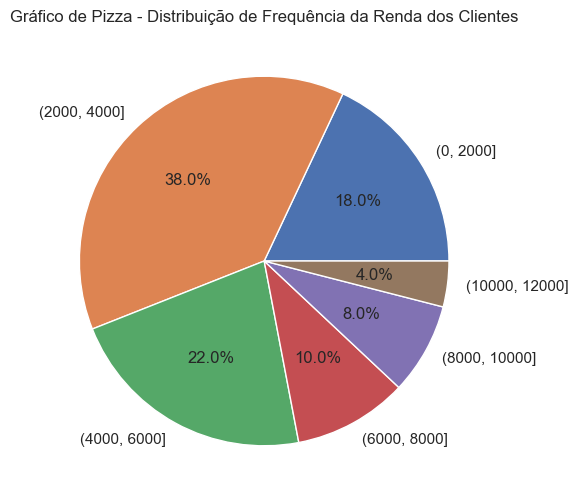

In [7]:
plt.figure(figsize=(8, 6))
plt.pie(frequency_table['Absolute Frequency'], labels=frequency_table['Interval'], autopct='%1.1f%%')
plt.title('Gráfico de Pizza - Distribuição de Frequência da Renda dos Clientes')
plt.show()

### Exercício 02

In [8]:
file_name = './dataset/exercicio_02.csv'
df = pd.read_csv(file_name, sep=';')
df.head()

,Ação 1,Ação 2
0,"-0,0212","0,2645"
1,"0,2438","0,2086"
2,"0,2296","0,1248"
3,"-0,2018","0,0209"
4,"0,1296","0,2055"


In [9]:
df['Ação 1'] = df['Ação 1'].apply(lambda x: x.replace('.', '').replace(',', '.')).astype(float)
df['Ação 2'] = df['Ação 2'].apply(lambda x: x.replace('.', '').replace(',', '.')).astype(float)
df.head()

,Ação 1,Ação 2
0,-0.0212,0.2645
1,0.2438,0.2086
2,0.2296,0.1248
3,-0.2018,0.0209
4,0.1296,0.2055


In [10]:
df_describe = df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
Ação 1,23.0,0.035204,0.129221,-0.2018,-0.0612,0.0370,0.11605,0.2814
Ação 2,23.0,0.151135,0.203822,-0.1490,0.0204,0.1248,0.23330,0.6260


In [11]:
for column in df.columns:
    df_describe['Amplitude'] = df.max() - df.min()
    df_describe['Variância'] = df.var()
    df_describe['Erro Padrão'] =  df.std() / np.sqrt(len(df))
    df_describe['Coeficiente de Variação'] = df.std() / df.mean()
    df_describe['Coeficiente de Assimetria'] = df.skew()
    df_describe['Coeficiente de Curtose'] = df.kurtosis()
df_describe.T

,Ação 1,Ação 2
count,23.000000,23.000000
mean,0.035204,0.151135
std,0.129221,0.203822
min,-0.201800,-0.149000
25%,-0.061200,0.020400
50%,0.037000,0.124800
75%,0.116050,0.233300
max,0.281400,0.626000
Amplitude,0.483200,0.775000
Variância,0.016698,0.041544


In [12]:
import scipy.stats as stats

# Definir as hipóteses nula (H0) e alternativa (H1)
H0 = "A correlação entre os dois valores do dataframe df é igual a zero."
H1 = "A correlação entre os dois valores do dataframe df é diferente de zero."

# Definir o nível de significância (alfa)
alfa = 0.05

# Calcular a estatística T de correlação
t_statistic, p_value = stats.pearsonr(df['Ação 1'], df['Ação 2'])

# Calcular o valor crítico para o teste bicaudal
critical_value = stats.t.ppf(1 - alfa/2, len(df) - 2)

# Comparar a estatística T calculada com o valor crítico
if abs(t_statistic) > critical_value:
    decision = "Rejeitar a hipótese nula. Há evidências estatísticas para suportar a hipótese alternativa."
else:
    decision = "Não rejeitar a hipótese nula. Não há evidências estatísticas para suportar a hipótese alternativa."

# Imprimir os resultados
print("Hipótese Nula (H0):", H0)
print("Hipótese Alternativa (H1):", H1)
print("Nível de Significância (alfa):", alfa)
print("Estatística T de correlação:", t_statistic)
print("Valor Crítico:", critical_value)
print("Decisão:", decision)
print("Valor de p:", p_value)


Hipótese Nula (H0): A correlação entre os dois valores do dataframe df é igual a zero.
Hipótese Alternativa (H1): A correlação entre os dois valores do dataframe df é diferente de zero.
Nível de Significância (alfa): 0.05
Estatística T de correlação: 0.29081897658677186
Valor Crítico: 2.079613844727662
Decisão: Não rejeitar a hipótese nula. Não há evidências estatísticas para suportar a hipótese alternativa.
Valor de p: 0.17822078262232166
